* Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Or, alternatively, **Restart & Run All**.

* Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

* You can always add additional cells to the notebook to experiment, to test your answers, or to provide additional support for your answers.

* You should not need to install new packages to complete an assignment. If you use any packages not available via the MATH405 `Project.toml` then your assignment will likely not be graded correctly.

* Submissions are only accepted via CANVAS!

* Late submissions: within 24h I will reduce the grade to 70%. I will not accept submissions after 24h. Please manage your time well and complete the assignments with plenty of buffer time.

* By entering your name below you confirm that you have completed this assignment on your own and without (direct) help from your colleagues. Plagiarism / copying will be checked by comparing assignments and by by testing understanding in workshops and the oral exam (final). I reserve the option to downgrade an assignment at any point.

In [1]:
NAME = "Owen Sheekey"

"Owen Sheekey"

---

# MATH 405/607 

# Numerical Methods for Differential Equations

## Assignment 3: ODEs


#### Notes

* **Due date:** Tue Nov 3, 2020, 1200 noon
* From here on all questions will count towards the grade, i.e. to get 100% you will need to answer all questions.
* Note also that this assignment is worth 14% of the overall grade (A1, A2 were 12% each, A4 will likely be 10%)

In [4]:
include("math405.jl")

 Activating environment at `~/Documents/UBC/Math/Math 405/math405_2020W/assignments/A3/Project.toml`
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


### Question 1 [10]

Implement Kutta's third-order method which has Butcher tableau
$$\begin{array}{c|ccc} 
    0 &   &   &   \\ 
    1/2 & 1/2 &   &   \\ 
    1 & -1 & 2 &     \\ 
    \hline 
      & 1/6 & 2/3  & 1/6 
\end{array}$$ 

The function you implement must have the signature `kutta3(f, u0, h, Tfinal)` and return `U, t`, as in the lectures; use the model given in the answer cell!


In [15]:

function kutta3(f, u0, h, Tf)
    t = 0.0:h:Tf 
    # make sure that h and Tf are compatible!
    @assert t[end] ≈ Tf     
    U = zeros(length(u0), length(t))
    U[:, 1] = u0 
    for n = 2:length(t)
        k1 = h * f(t[n-1]        , U[:, n-1])
        k2 = h * f(t[n-1] + 0.5*h, U[:, n-1] + 0.5*k1)
        k3 = h * f(t[n-1] + h    , U[:, n-1] - k1 + 2*k2)
        U[:, n] = U[:, n-1] + (1/6)*k1 + (2/3)*k2 + (1/6)*k3
    end 
    return U, t
end 

kutta3 (generic function with 1 method)

If you wish you may write a test to check the correctness of your implementation in the cell below. E.g.,  you could use a model from the lectures, or from this assignment or pick your own. Test against an exact solution or against the Julia ODE suite. If your tests don't pass, maybe try first to make them pass with the `euler` and `ieuler` codes from the lectures. That way you can determine whether your the bug is in your code or in your tests.

NOTE: This cell is "manually graded" but there are 0 points available. You will not be penalized if you don't complete this task!

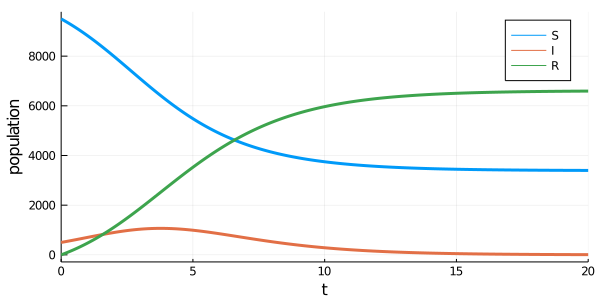

In [16]:
using OrdinaryDiffEq
# u = [S, I, R]
const β = 1.23; const γ = 0.789; const N = 10_000
f(t, u) = [ - β * u[1] * u[2] / N, 
              β * u[1] * u[2] / N - γ * u[2], 
                                    γ * u[2] ]
u0 = [ N * 0.95, N * 0.05, 0.0 ]
prob = ODEProblem((u,p,t) -> f(t, u), u0, (0.0, 20.0))
sol = solve(prob, Tsit5());

plot(sol, vars = 1, lw=3, label = "S", size = (600, 300), ylabel="population")
plot!(sol, vars = 2, lw=3, label = "I")
plot!(sol, vars = 3, lw=3, label = "R")

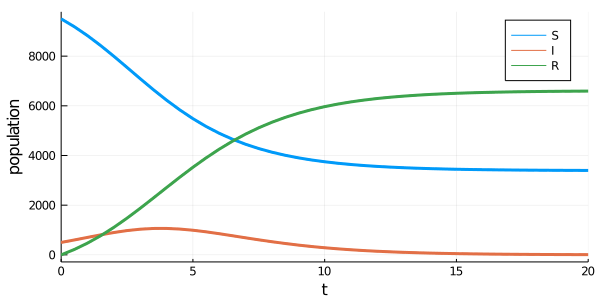

In [17]:
U, tt = kutta3(f, u0, 0.5, 20.0)   # play with the time-step!!
plot(sol, label = "", size = (600, 300), lw=2, ls = :dash, ylabel="population")
plot!(tt, U[1,:], lw=3, c=1, label = "S", size = (600, 300))
plot!(tt, U[2,:], lw=3, c=2, label = "I")
plot!(tt, U[3,:], lw=3, c=3, label = "R")

In [ ]:
# So that looks roughly correct. Lets take a look at the actual error to make sure that falls in with what we would predict.

### Question 2 [5+5+5+5]

Read the documentation on [choices of ODE solvers](https://diffeq.sciml.ai/dev/solvers/ode_solve/) then solve the following IVPs, first with your `kutta3` method, and then with an adaptive ODE solver from this package.  In each case ensure that the solution is accurate to at least 4 digits. The solutions must be stored as `soln_x` and `mysoln_x` where `x = a, b, c, d`
```julia 
soln_a = solve(ODEProblem(...    # adaptive solver solution 
mysoln_a = kutta3(...  # kutta3 solution 
soln_b = ... 
```
Make sure you convert the scalar systems to vectorial ones.

(a) 
$$ 
    \dot{x}(t) = -  x(t)^2, \qquad x(0) = 1, t \in (0, 1)
$$

(b) 
$$ 
    (1+t^3) x(t) \dot{x}(t) = t^2, \qquad x(0) = 1, t \in (0, 3)
$$


(c) The Fitzhugh–Nagumo equations are a simple model of the repeated firing of a neuron. They are given by
$$\begin{aligned} 
    \dot{v}_1 &= - v_1 (v_1 - 1) (v_1 - a) - v_2 + I, \\ 
    \dot{v}_2 &=  \epsilon (v_1 - \gamma v_2).
\end{aligned}$$
Assume $v_1(0) = 0.5, v_2(0) = 0.1, a = 0.1, \epsilon = 0.008, \gamma = 1, I = 0.055$. Solve for $t \in (0, 600)$.


(d) First convert to a first-order system using the canonical substitution $u_1 = x, u_2 = \dot{x}$,
$$
    0.1 \ddot{x} + \dot{x} = - 10 x^2 +  e^{-t}, \qquad x(0) = 1, \dot{x}(0) = 0, \qquad t \in (0, 10)
$$





**NOTE:** Think about managing your computational resources, i.e., use a method that is suitable for the desired accuracy and set the tolerance to a reasonable value. I won't reduce your score against this issue, but it is useful for you if you can give it some thought.

In [ ]:
# (a)

# you can test your solution againstthe exact solution for (a)
# refsol_a = t -> 1 / (1+t);

# (b)

# (c) 

# (d)


### Question 3 [5]

Find the reference (i.e. the journal article) for the `Tsit5()` solver and post it here. Summarize in 1-2 sentences why `Tsit5()` is the recommended default solver for `OrdinaryDiffEq.jl`.


YOUR ANSWER HERE

### Question 4 [5+10+5]

Consider van der Pol's oscillator,  
$$
    \ddot{x} - \mu (1-x^2) \dot{x} + x = 0. 
$$

(a) Use the Lienard transform,
$$ 
    y = x - x^3 / 3 - \dot{x} / \mu 
$$
to convert it to a first-order system
$$\begin{aligned}
    \dot{x} &= f_1(x, y) \\ 
    \dot{y} &= f_2(x, y)
\end{aligned}$$
for $u = (u_1, u_2) = (x, y)$. Implement this system as a function 
```julia 
f_vdp(u, p, t) = [ ..., 
                   ... ]
```
where `p` is the value of the parameter $\mu$.

In [ ]:
# Solution part (a)

# YOUR CODE HERE


(b) Solve the VDP equation as the first order system implemented in (a) with initial condition $(x_0, y_0) = (1, 0)$ and parameters $\mu = 2$ and $\mu = 8$, and for $0 \leq t \leq 50$. Produce phase space plots for both trajectories in a single figure. Try to make the figure close to publication quality (labels, axis, formatting, etc)

In [ ]:
# Solution part (b)

# YOUR CODE HERE


(c) For each of the two cases $\mu = 2, 8$ decide whether the problem is stiff. Explain your reasoning. You can use the code cell below to experiment and can reference the results of these experiments in your solution. [The code cell as 0-score attached, so you won't be graded against that code, but only against  your answer in the text cell.]

Note this question can have a very brief answer or a more in-depth investigation. For a particularly nice discussion we can give bonus points.

In [ ]:
# Use this cell if you want to run some additional to support your answer below.

# YOUR CODE HERE

YOUR ANSWER HERE

### Question 5 [10]

A model for the (vertical) velocity $v(t)$ of a skydiver is 
$$ 
    \dot{v}(t) = - g + \frac{k}{m} v^2
$$
where $g$ is graviational acceleration, $m$ is the mass of the skydiver with parachute and $k$ quantifies the effect of air resistance. Use SI units, i.e. m/s for velocity and kg for mass. For the mass we will take $m = 100 {\rm kg}$. 

Suppose a jump starts at 1,200m with closed parachute with friction parameter $k = 0.4875~{\rm kg/m}$. After 13 seconds, the diver opens the parachute at which point the friction parameter changes to $k = 29.16~{\rm kg/m}$.

Decide what the initial condition should be! Define it in your code as 
```julia 
v0 = ... 
```
Then find the time at which the diver hits the ground, and the velocity at impact, and define them in your code as 
```julia
t_impact = ...
v_impact = ... 
```
Ensure that both are accurate to within 1% tolerance.


In [ ]:

# YOUR CODE HERE


# let's just do a very quick test to make sure the orders of magnitude are right! 
# If this fails then you likely havee a bug / made a wrong assumption somewhere
println(@test -10 < v_impact < 0)
println(@test 0 < t_impact < 1000)

### Question 6 - The Crank-Nicholson Method [10 + 10]

Recall the Crank-Nicholson method from the lectures: 
$$ 
    U_{n+1} = U_n + \frac{h}{2}\big( f(nh, U_n) + f((n+1)h, U_{n+1}) \big)
$$

(a) Define and estimate the truncation error. What is the order of accuracy?

(b) Compute the region of stability, and conclude that the CN method is A-stable.

YOUR ANSWER HERE

### Question 7 - Energy conservation [10 + 5 + 5 + 5]

Consider a harmonic oscillator, $\ddot{r} = - c r$ with Hamiltonian $H = \frac12 v^2 + \frac{c}{2} r^2$, where $c > 0$. In the lecture we stated that the explicit and implicit Euler methods satisfy 
$$
    H_{n+1} - H_n 
    =
    \begin{cases}
        ch^2 H_n & \text{Euler method}  \\
        - c  h^2 H_{n+1} & \text{Implicit Euler method} 
    \end{cases}
$$

(a+) Prove the above result only for the explicit Euler method (the proof for the implicit Euler method is similar). Hint : Use the fact that $R_{n+1}^2 - R_n^2 = (R_{n+1}-R_n)(R_{n+1}+R_n)$ and similar for $V_{n+1}^2 - V_n^2$.

(b) Deduce that $(R_n, V_n) \to 0$ for the implicit Euler method, but $(R_n, V_n) \to \infty$ for the explicit Euler method.

(c) For the Euler-A method, prove that there is a shadow hamiltonian which is conserved. (see L08 for details and hints!)

(d+) What is the situation for the Crank-Nicholson scheme? 

YOUR ANSWER HERE